In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [5]:
loan_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv") 

In [6]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
loan_df.head(10) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [8]:
loan_df.shape

(5000, 14)

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [10]:
# check the missing values

loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


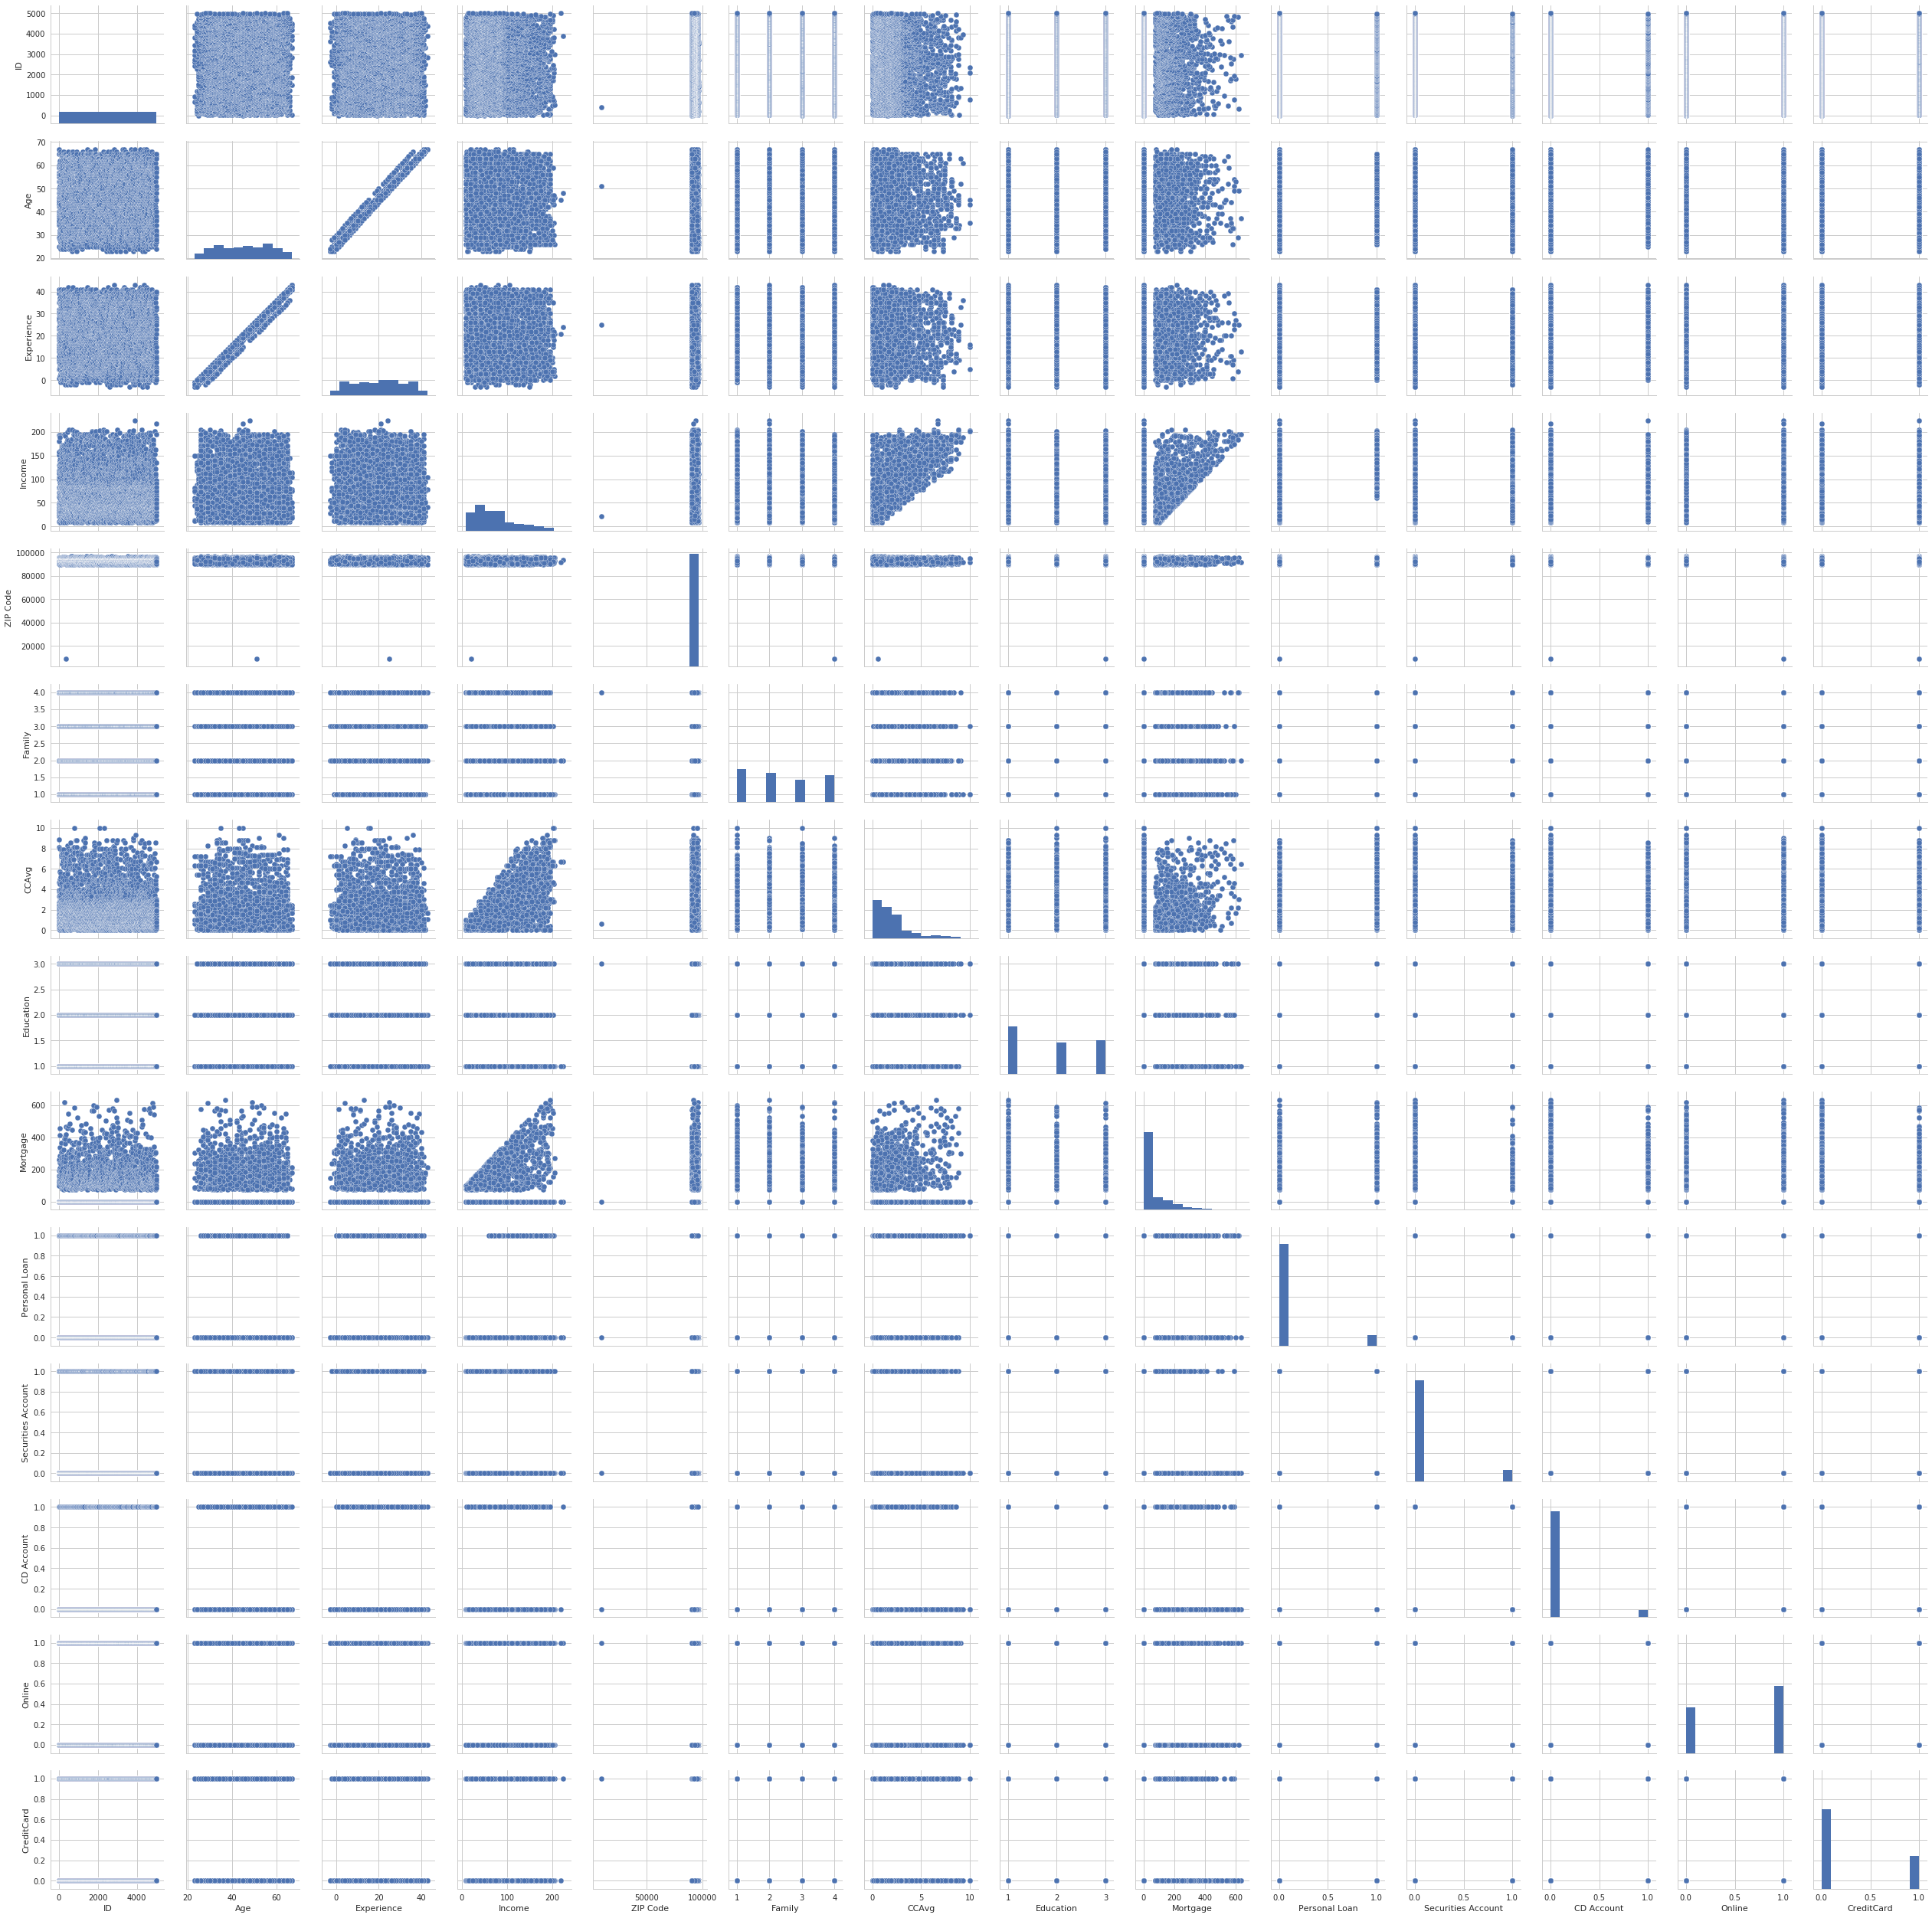

In [11]:
sns.pairplot(loan_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faff05e4ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fafee62aad0>]], dtype=object)

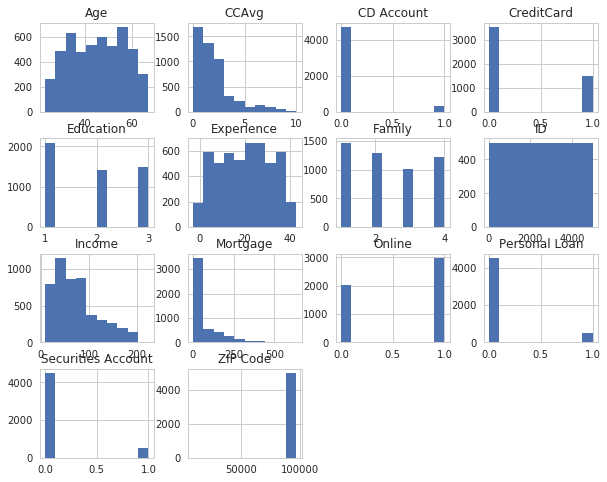

In [12]:
loan_df.hist(figsize=(10,8))

ID                       Axes(0.125,0.536818;0.0945122x0.343182)
Age                   Axes(0.238415,0.536818;0.0945122x0.343182)
Experience            Axes(0.351829,0.536818;0.0945122x0.343182)
Income                Axes(0.465244,0.536818;0.0945122x0.343182)
ZIP Code              Axes(0.578659,0.536818;0.0945122x0.343182)
Family                Axes(0.692073,0.536818;0.0945122x0.343182)
CCAvg                 Axes(0.805488,0.536818;0.0945122x0.343182)
Education                   Axes(0.125,0.125;0.0945122x0.343182)
Mortgage                 Axes(0.238415,0.125;0.0945122x0.343182)
Personal Loan            Axes(0.351829,0.125;0.0945122x0.343182)
Securities Account       Axes(0.465244,0.125;0.0945122x0.343182)
CD Account               Axes(0.578659,0.125;0.0945122x0.343182)
Online                   Axes(0.692073,0.125;0.0945122x0.343182)
CreditCard               Axes(0.805488,0.125;0.0945122x0.343182)
dtype: object

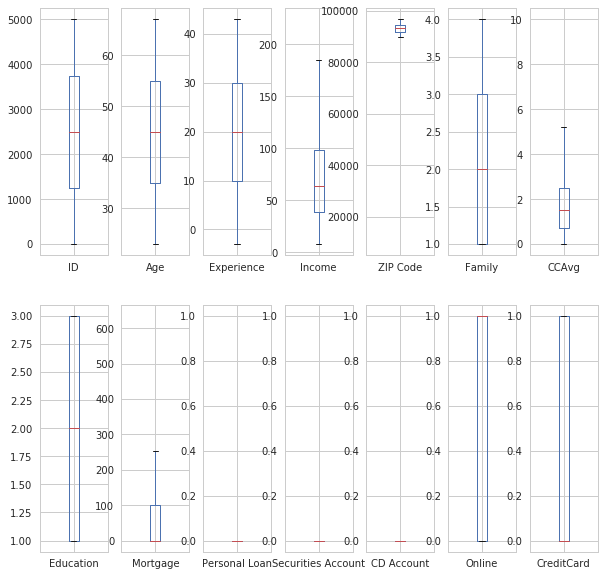

In [13]:
loan_df.plot(kind= 'box' , subplots=True, layout=(2,7), sharex=False, sharey=False, figsize=(10,10))

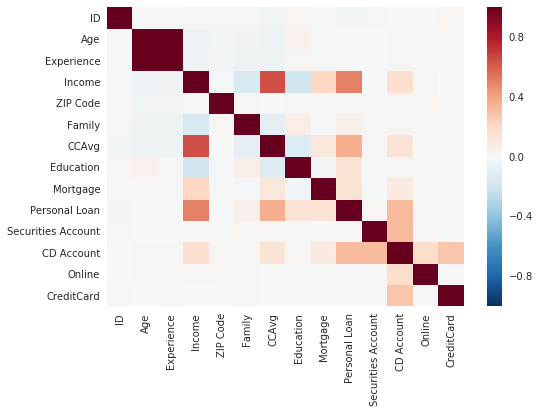

In [14]:
# Check the independence between independent variables

corr = loan_df[loan_df.columns].corr()
sns.heatmap(corr, annot = False)

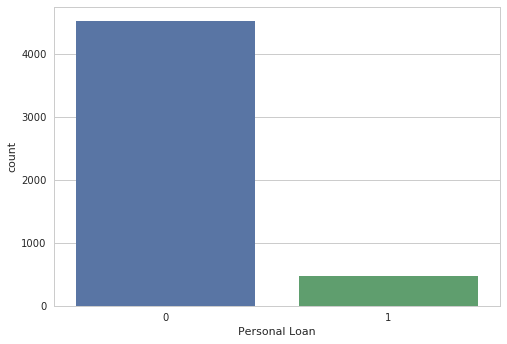

In [15]:
# Barplot for Personal Loan

sns.countplot(x="Personal Loan", data=loan_df)
plt.show()

In [ ]:
# Observations

# There are no null values
# Most of the people did not take personal loan
# People with more Income use their credit cards more often and have more value of house mortgage.
# Education has not much effect on the credit card usage or personal loan taken
# Number of family member has also not much effect on the credit card usage or personal loan taken
#
#
#

In [43]:
loan_df.loc[loan_df['Experience'] < 0].agg(['count'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,52,52,52,52,52,52,52,52,52,52,52,52,52,52


In [31]:
loan_df.loc[loan_df['Personal Loan'] == 1].loc[loan_df['CCAvg'] > 5].agg(['count'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,138,138,138,138,138,138,138,138,138,138,138,138,138,138


In [32]:
loan_df.loc[loan_df['Personal Loan'] == 1].loc[loan_df['CCAvg'] >= 5].agg(['count'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,147,147,147,147,147,147,147,147,147,147,147,147,147,147


In [36]:
loan_df.loc[loan_df['Personal Loan'] == 1].loc[loan_df['CCAvg'] < 5].agg(['count'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,333,333,333,333,333,333,333,333,333,333,333,333,333,333


In [37]:
loan_df.loc[loan_df['CCAvg'] < 5].agg(['count'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636


In [38]:
loan_df.loc[loan_df['CCAvg'] >= 5].agg(['count'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,364,364,364,364,364,364,364,364,364,364,364,364,364,364


In [44]:
loan_df.loc[loan_df['Personal Loan'] == 1].loc[loan_df['CCAvg'] >= 5].agg(['count']) / loan_df.loc[loan_df['CCAvg'] >= 5].agg(['count'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,0.403846,0.403846,0.403846,0.403846,0.403846,0.403846,0.403846,0.403846,0.403846,0.403846,0.403846,0.403846,0.403846,0.403846


In [45]:
loan_df.loc[loan_df['Personal Loan'] == 1].loc[loan_df['CCAvg'] < 5].agg(['count']) / loan_df.loc[loan_df['CCAvg'] < 5].agg(['count'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,0.071829,0.071829,0.071829,0.071829,0.071829,0.071829,0.071829,0.071829,0.071829,0.071829,0.071829,0.071829,0.071829,0.071829


In [46]:
loan_taken_df = loan_df.loc[loan_df['Personal Loan'] == 1]

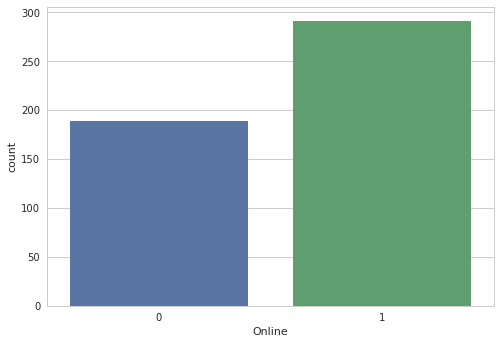

In [55]:
sns.countplot(x="Online", data=loan_taken_df)
plt.show()

In [56]:
loan_nottaken_df = loan_df.loc[loan_df['Personal Loan'] == 0]

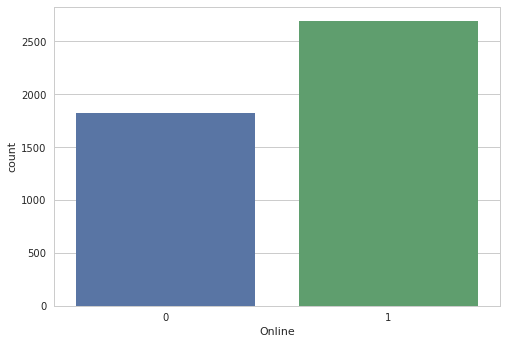

In [57]:
sns.countplot(x="Online", data=loan_nottaken_df)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafe6099810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fafe772ff90>]], dtype=object)

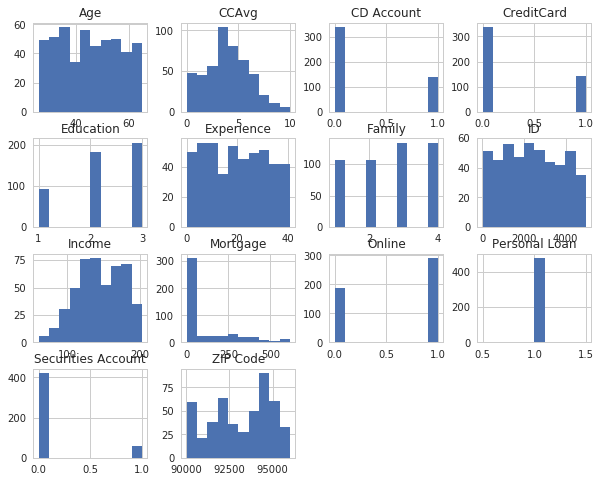

In [61]:
loan_taken_df.hist(figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafe763f350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fafe528ae90>]], dtype=object)

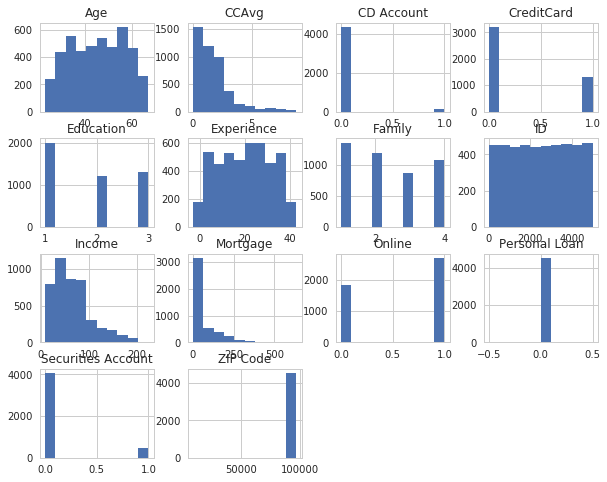

In [62]:
loan_nottaken_df.hist(figsize=(10,8))

In [ ]:
#1. Age and Experience are lineraly correlated.
#2. ID and ZIP code can be taken off from dataframe for further analysis.
#3. Experience field is having 52 negative values.
#4. From the raw data (Comparing histogram of people opted for loan vs people not opted for loan)
	#It looks like people with credit card spending more than $3000 per month are more likely to opt for personal loan (ratio).
	#People with CD account have opted relatively more for personal loans.
	#People with higher income have opted for personal loans more.
	#People with family size 3 and 4 have opted more for personal loans more.
	#Graduates and Advanced educated people have opted more for personal loans.